In [190]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

mag = pd.read_csv(r"C:\Users\cacam\Downloads\Job2_2024-06-21T03-16-34-079.csv", delimiter=',')

samples = mag['Sample']
times = mag['Time (s)']
voltages = mag['Voltage 0 (V)']


seis = pd.read_csv(r"C:\Users\cacam\Downloads\seismo_test.csv", delimiter=',')

sam = seis['Sample']
tim = seis['Time (s)']
z = seis['Channel Z (V)']
n = seis['Channel N (V)']
e = seis['Channel E (V)']

In [68]:
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout


x = times 
y = voltages 

def plot_with_slider(xlim):
    
    window_size = 10
    y_smoothed = y.rolling(window=window_size).mean()
    
    plt.figure(figsize=(17, 5))   ## dpi breaks slider
    plt.plot(x, y_smoothed, linewidth = 1.5)
    plt.xlim(xlim, xlim + 0.5)   
    plt.ylim(y.min() - 0.0005, y.max() + 0.0005) 
    
    #plt.axhline()
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (times[len(times)-1]), step = 0.5, value = 0, layout=Layout(width='450px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='450px'), max=22.799961, …

<function __main__.plot_with_slider(xlim)>

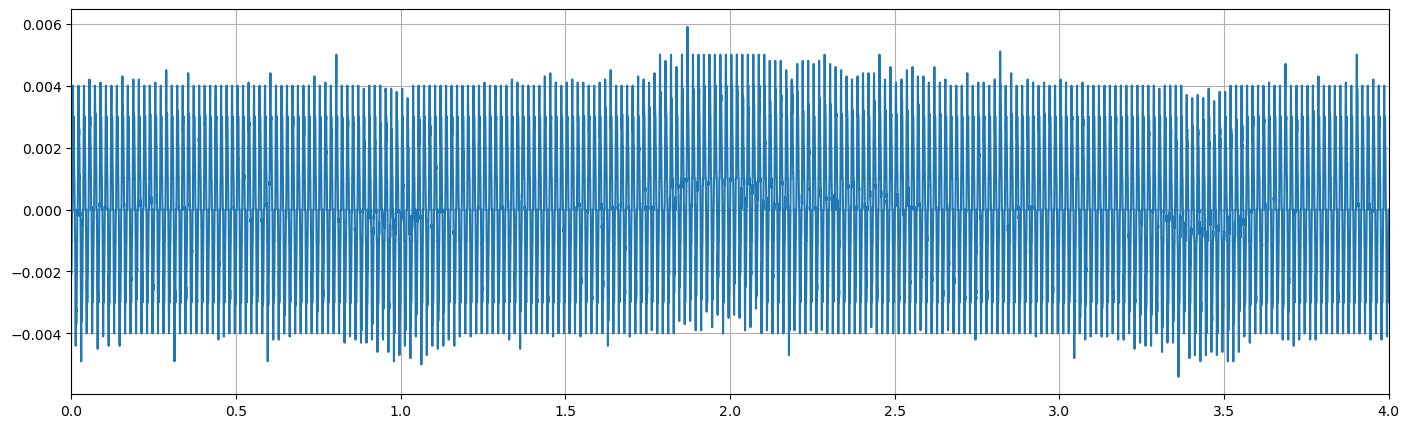

In [88]:
start = 0  ##in terms of seconds 
end = 4   # times[len(times)-1]

i = 0
j = 0

for i in range(0, len(times)):
    if times[i] == start:
        alpha = samples[i]
        
for j in range(0, len(times)):
    if times[j] == end:
        beta = samples[j]

t = times[alpha:beta]
v = voltages[alpha:beta]


window_size = 10
v_smoothed = v.rolling(window=window_size).mean()

plt.figure(figsize = (17, 5))
plt.plot(t,v_smoothed)

plt.xlim(start,end)
plt.grid(True)

In [191]:
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout


x1 = tim 
y1 = z
y2 = n
y3 = e

def plot_with_slider(xlim):

    plt.figure(figsize=(17, 5))   ## dpi breaks slider
    
    ax = plt.axes()
    ax.set_facecolor("grey")
    
    plt.plot(x1, y1, linewidth = 1.5, color = 'limegreen', label = 'Z')
    plt.plot(x1, y2, linewidth = 1.5, color = 'red', label = 'N')
    plt.plot(x1, y3, linewidth = 1.5, color = 'blue', label = 'E')
    
    plt.xlim(xlim, xlim + 0.5)   
    plt.ylim(y.min() - 2.75, y.max() + 2.75) 
    #plt.axhline()
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (tim[len(tim)-1]), step = 0.5, value = 0, layout=Layout(width='450px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='450px'), max=17.066602, …

<function __main__.plot_with_slider(xlim)>

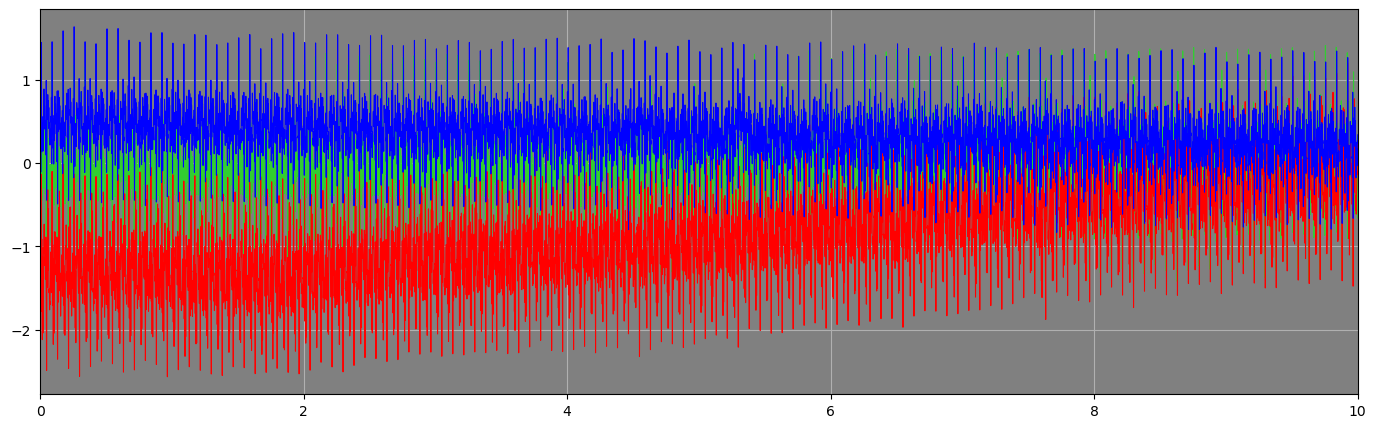

In [192]:
start = 0  ##in terms of seconds 
end = 10   # times[len(times)-1]

a = 0
b = 0
c = 0
d = 0

for a in range(0, len(tim)):
    if tim[a] == start:
        gamma = sam[a]
        
for b in range(0, len(tim)):
    if tim[b] == end:
        delta = sam[b]

t1 = tim[gamma:delta]
z1 = z[gamma:delta]
n1 = n[gamma:delta]
e1 = e[gamma:delta]


plt.figure(figsize = (17, 5))

ax = plt.axes()
ax.set_facecolor("grey")
    
plt.plot(t1,z1, linewidth = 0.75, color = 'limegreen', label = 'Z')
plt.plot(t1,n1, linewidth = 0.75, color = 'red', label = 'N')
plt.plot(t1,e1, linewidth = 0.75, color = 'blue', label = 'E')

plt.xlim(start,end)
plt.grid(True)

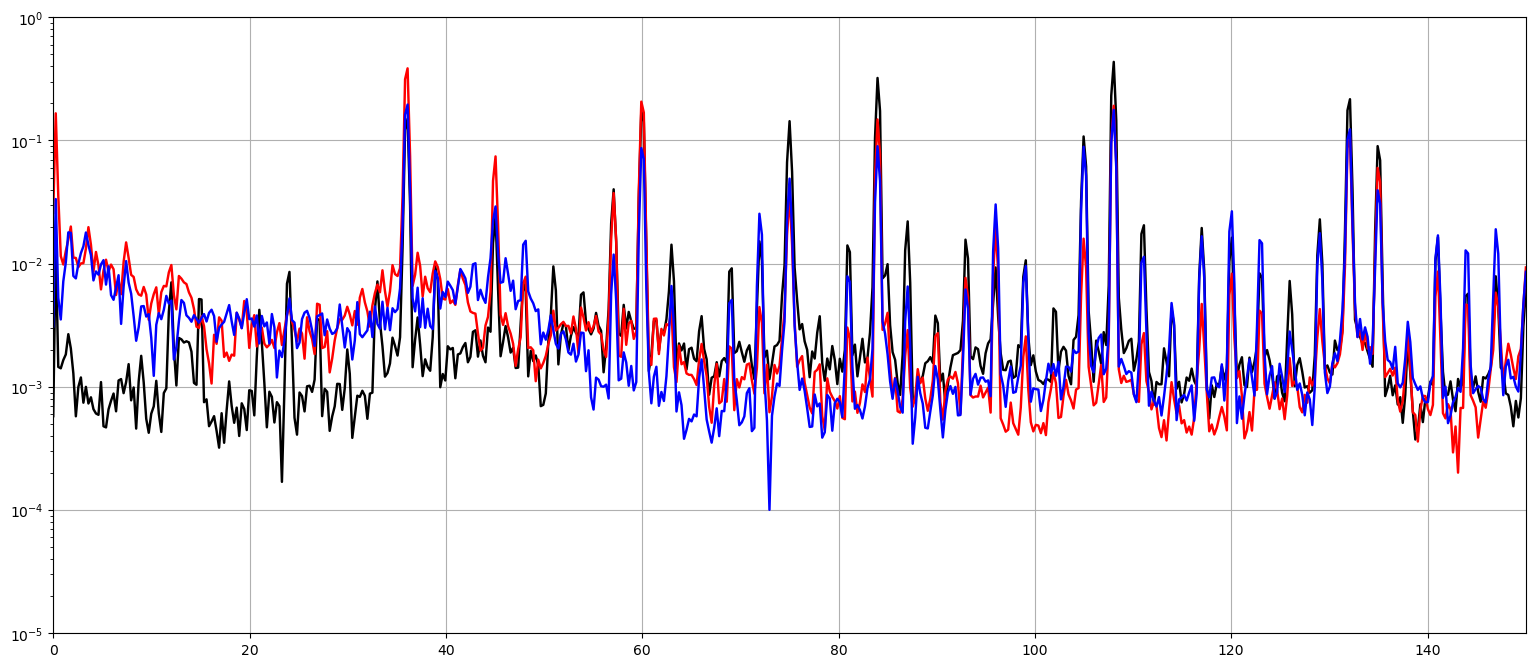

In [253]:
from scipy import signal

f_z, Pxx_den_z = signal.welch(z1, 25600, window='hamming', nperseg=100000)
f_n, Pxx_den_n = signal.welch(n1, 25600, window='hamming', nperseg=100000)
f_e, Pxx_den_e = signal.welch(e1, 25600, window='hamming', nperseg=100000)

plt.figure(figsize = (19, 8))


plt.semilogy(f_z, Pxx_den_z ** 0.5, color = 'black', linewidth = 1.75)
plt.semilogy(f_n, Pxx_den_n ** 0.5, color = 'red', linewidth = 1.75)
plt.semilogy(f_e, Pxx_den_e ** 0.5, color = 'blue', linewidth = 1.75)


#plt.title('FFT of the Signal')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Magnitude')

'''
plt.axvline(x = 12, color = 'orange')
plt.axvline(x = 15, color = 'orange')

plt.axvline(x = 24, color = 'orange')
plt.axvline(x = 36, color = 'orange')
plt.axvline(x = 45, color = 'orange')
plt.axvline(x = 48, color = 'orange')
plt.axvline(x = 60, color = 'orange')
plt.axvline(x = 72, color = 'orange')
plt.axvline(x = 75, color = 'orange')
plt.axvline(x = 84, color = 'orange')
plt.axvline(x = 92, color = 'orange')
plt.axvline(x = 96, color = 'orange')
'''

plt.ylim([10e-6, 1])
plt.xlim(0,150)
plt.grid(True)
plt.show()